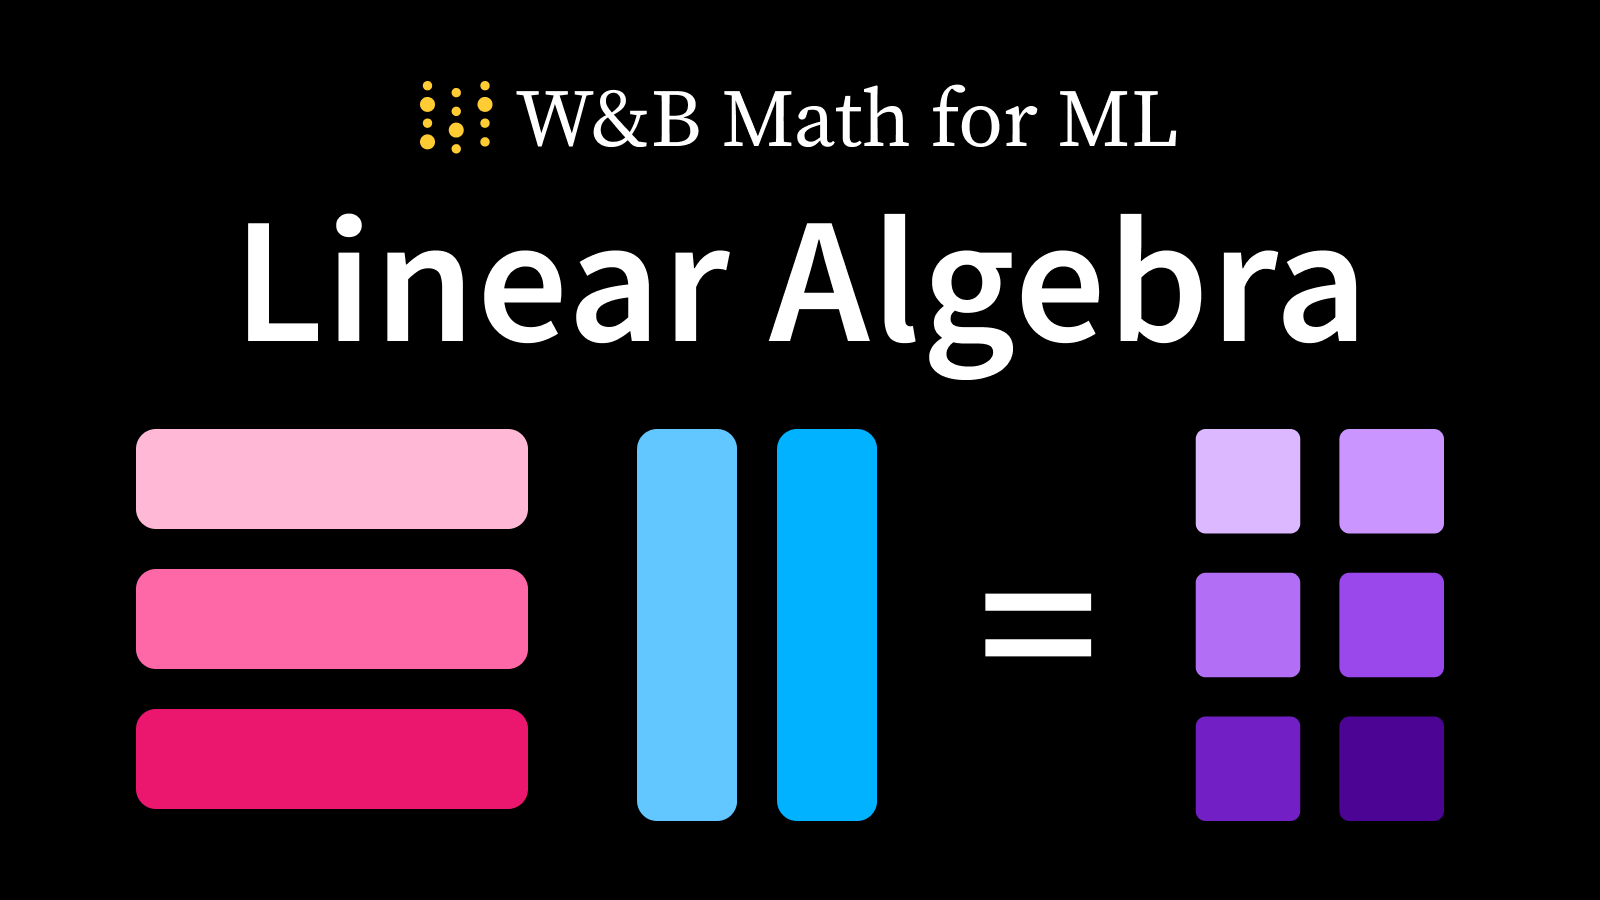

## Setup Code

This section includes setup code for the remaining sections.

In [ ]:
%%capture

if "google.colab" in str(get_ipython()):
    %cd "/content/"
    !git clone "https://github.com/wandb/edu.git"
    %cd "edu/math-for-ml"
    !pip install --upgrade -r requirements-colab.txt
    %cd "01_linearalgebra"
else:
    pass

# importing from standard library
import sys

# importing libraries
import numpy as np
import wandb

if "../" not in sys.path:
    sys.path.append("../")

# importing course-specific modules
import autograder
import utils

### Automated Feedback

The cells in this section set up an automatic feedback system, or "autograder",
that provides immediate feedback on your solutions to the exercises
and reports your progress to the
[Weights & Biases](http://wandb.com/)
project page that appears in the output.

Because the grader relies on Weights & Biases,
you'll need to log in to the service
to proceed with the exercises.

Execute the first cell below and follow the prompts
to either create a new account or log in to an existing one.

In [ ]:
wandb.login()

In [ ]:
try:
    grader
except NameError:
    grader = autograder.WandbTrackedOK(
        "wandb", "utils/config", "linearalgebra", "utils/")

Throughout this notebook, you will see cells like the one below.

They immediately follow exercises and will run some tests to check
whether your solutions are correct.
They are included because quick, specific feedback has been
[shown to improve learning](https://files.eric.ed.gov/fulltext/EJ786608.pdf).

Run the cell below to see an example of the grader output
for an incorrect question.
The output will include some setup code,
then a series of tests and, towards the bottom, the lines
```
# Error: expected
# x
# but got
# y
```
where `x` is the output the autograder expected,
and the lines `y` following show what was produced by your code.

This particular test is failing because the `dimensions` variable is not defined.
Try defining `dimensions = []` and `dimensions = {}`
and see how the output changes.
You'll see how to correctly answer this question in the following section.


In [ ]:
grader.grade("q01")

# Linear Algebra as Programming

The name "linear algebra" evokes
associations with arithmetic and solving equations, like $x+2=4$.
That's where the field has its roots and it's still one of the
[major applications of linear algebra](https://en.wikipedia.org/wiki/System_of_linear_equations).

But in machine learning, the purpose of linear algebra is quite different,
and intuitions from algebra aren't very helpful,
as described in the
[lecture accompanying this notebook](http://wandb.me/m4ml-video-1).

In ML, and especially in deep learning,
we instead use linear algebraic objects and operations the same way that,
in programming,
we use constructs like variables, functions, and control flow,

The sections below introduce a number of
linear algebraic concepts and connect them to constructs in programming:
- *types* and *shapes*
- *function application* and *matrix multiplication*
- *for loops* and *matrix multiplication*
- *concatentation* and *parallelization*

> _Note:_ The primary library for working with arrays in Python is `numpy`,
which is typically `import`ed `as np` (see above).
This notebook is not a full introduction to `numpy`.
If you'd like a more in-depth tutorial,
check out
[this online tutorial](https://cs231n.github.io/python-numpy-tutorial/)
from a Stanford course on neural networks.

## Types in Linear Algebra: Shapes and Dimensions

In programming, we define functions that work on data with specific _types_.

For instance, the function `square` defined below,
which returns the square of a number,
cannot be applied to, say, strings or dictionaries or `UserRecord`s.

When we apply a function to data of the wrong type,
Python raises an `Error` (specifically, a `TypeError`).

In [ ]:
def square(x):
    return x ** 2

try:
    square("a")
except TypeError as e:
  print("TypeError:", e)

This information is sometimes incorporated into the function's definition as a
_type signature_, as in the redefinition of `square` below:


In [ ]:
def square(x: float) -> float:
    return x ** 2

> _Note:_ In Python 3, type signatures
are not enforced -- any function can be called on any object,
regardless of types.
This information can be used by [type checkers](https://realpython.com/python-type-checking/)
or just as an annotation for human readers.

The equivalent notion to "type" in linear algebra
is _shape_.
That is, when we define a function that operates on arrays,
it will generally take in and return arrays with certain shapes,
returning an error if the shape is incorrect.

For example, we can think of matrices as functions
that take in vectors and return vectors,
via matrix multiplication.
A matrix with shape `(M, N)` takes in vectors of shape `N`
and returns vectors of shape `M`.

If we try to apply the matrix to a vector whose shape is not `N`,
we get an error,
just like when we tried to apply `square` to a string.

In [ ]:
matrix = np.array([[1, 2], [3, 4], [5, 6]])  # 3 x 2 matrix
vector = np.array([7, 8])  # length 2 vector

print(matrix @ vector)  # length 3 vector

try:
  vector = np.array([7, 8, 9])  # length 3 vector
  print(matrix @ vector)
except ValueError as e:
  print("ValueError:", e)

Each element of the shape tuple
indicates the size of the array along one _axis_,
also known as its _dimension_ along that axis.

The length of the shape tuple gives the number of array dimensions/axes.
To access a particular element of an array,
we need to provide, for each axis,
a number greater than or equal to `0`
and less than the array's dimension.


The cell below creates four arrays, then prints them out.

After reviewing the code and the printed arrays,
store the _number of dimensions_ of these arrays in a dictionary
called `dimensions`.
Use the variable names as keys.
Then execute the cell with `grader.grade` to check your answer.

This is an exercise.
Exercises in this notebook will be indicated with the format below:

#### Store the dimensions of these arrays in a dictionary called `dimensions`.

Remember that you can add new cells to this notebook,
where you can write additional code.
This is particularly helpful when you get stuck.

In [ ]:
A = np.array([1])
B = np.array([[1, 2]])
C = np.array([[1, 0], [0, 1]])
D = np.array([[3], [2]])

print(A, "\n"), print(B, "\n"), print(C, "\n"), print(D);

In [ ]:
dimensions = {}

In [ ]:
grader.grade("q01")

#### Now, do the same with the _shapes_ of the arrays in a dictionary called `shapes`.

> _Note:_ shapes are represented with tuples in Python: e.g. `(x, y, z)`
for an array of three dimensions.

In [ ]:
shapes = {}

In [ ]:
grader.grade("q02")

Heads up:
if you want to know the dimension and shape of a numpy array,
use the `.ndim` and `.shape` attributes.
Very handy to put in `print`s or `assert`s while debugging!

In [ ]:
A.ndim, B.ndim, C.ndim, D.ndim

In [ ]:
A.shape, B.shape, C.shape, D.shape

The _transpose_ is a common matrix operation.
It's so common, it gets represented as an attribute _and_
as a single-letter to boot!

The transpose of a matrix `M` is written in `numpy` as `M.T`.

The cell below prints the transposes of three of the matrices above.

In [ ]:
print(B.T), print(C.T), print(D.T);

Compare the transposed matrices to the originals.
Can you describe, in your own words, what the transpose does?

Transposition is closely related to matrix shape.



#### Define a function, `shape_of_transpose`, that takes in a `matrix` and returns the shape of the transpose of the matrix.

Try doing this two ways: with and without transposing `matrix` inside the body of the function.

Then, execute the `grader.grade` cell to check your answer.

In [ ]:
def shape_of_transpose(matrix):
    pass  # define your function here

In [ ]:
grader.grade("q03")

Fun fact: the transpose is also a linear operation,
and so can be represented by a tensor!
That fact is not useful for implementations of transposition,
but it is incredibly useful for linear algebra.

## Functions and Composition in Linear Algebra: Matrix Multiplication

As noted above,
matrices can be thought of as functions
that can take in vectors and return vectors.

When working with matrices in mathematics,
we tend to give them names like $X$ and $Y$,
just like we give functions, in mathematics,
names like $f$ and $g$.

But when we're programming,
we prefer to give our functions meaningful names,
like `delete_user` or `print`.

For example, the cell below defines
a matrix that sets the second element
of a two-dimensional input vector to `0`
and names it accordingly.

In [ ]:
set_second_to_zero = np.array([[1, 0],
                               [0, 0]])
vector = [10, 1]
assert (set_second_to_zero @ vector)[1] == 0

#### In the cell below, define a matrix `repeat_3_2` that takes in a vector of length two and returns it repeated three times.

That is, given the input vector `[x, y]`,
the matrix should return `[x, y, x, y, x, y]`.

> _Hint:_ think through the input and output shapes here. The input is shape `(2,)` and the output has shape `(3 * 2,)`. Based on this information, what should the shape of `repeat_3_2` be?

In [ ]:
repeat_3_2 = None # define the array here

In [ ]:
grader.grade("q04")

Matrix multiplication isn't just for applying matrices to vectors.
When we multiply two matrices (of matching shapes!) together,
the result is a new matrix.

This new matrix is also a function -- it can also be applied to vectors
and will return a vector.

This is the linear algebra version of _function composition_:
defining a function `h`
that applies the function `g` to the outputs of the function `f`.

For example, if we can determine the length of a string (`length_str`)
and compare it to the maximum length for a tweet (`over_140`),
then we can determine if a string is `too_long_to_tweet`:

In [ ]:
def too_long_to_tweet(s: str) -> bool:
    return over_140(length_str(s))


def over_140(k: int) -> bool:
    return k > 140


def length_str(s: str) -> int:
    return len(s)
    

(too_long_to_tweet("hello world!"),
    too_long_to_tweet(np.ndarray.__doc__))

Note the type annotations:
the input types of `length_str` and `too_long_to_tweet` match
(both are `str`),
as do the output types of `over_140` and `too_long_to_tweet`
(both are `bool`).

Similarly,
when we multiply the matrices `A` and `B` together to make a matrix `C = A @ B`,
the number of columns of `B` and `C` match,
as do the number of rows of `A` and `C`.

Note further that
the output type of `length_str`
matches the input type of `over_140`:
both are `int`.

Similarly,
in order to multiply the matrices `A` and `B` together as `A @ B`,
the number of columns of `A`
must equal the number of rows of `B`.

#### In the cell below, define a function `are_compatible` that checks whether two matrices `A` and `B` can be multiplied together in that order.

In [ ]:
def are_compatible(A, B):
  """Returns True if A @ B is a valid matrix multiplication."""
  pass  # implement the function here

In [ ]:
grader.grade("q05")

Just as we can define complex functions
by composing together simpler ones,
we can define more complex matrices
by multiplying together simpler ones.

#### Define a matrix, `set_second_to_zero_and_repeat_3`, that takes in a length-2 vector and repeats it 3 times, but with second entry set to `0`.

> _Hint:_ you can define this matrix in one line using matrix multiplication and the matrices `set_second_to_zero` and `repeat_3_2`.

In [ ]:
set_second_to_zero_and_repeat_3 = None  # define matrix here

In [ ]:
grader.grade("q06")

Just as, when programming,
we can write one function that does
mutltiple steps
or write a separate function for each step,
when working with linear algebra,
we can either write one matrix
to apply all of our transformations
or we can write a separate matrix
for each transformation.

Consider the following scenario:

You're looking through a fellow developer's code and notice that in
`their_pipeline`, which appears below,
a large amount of data is being passed through four successive matrix operations: in order, the data vectors are multiplied by `W`, then `X`, then `Y`, and finally by `Z`.

For simplicity's sake, you want to collapse these four multiplications
into one operation, call it `V`.

#### Use matrix multiplication to define `V`.

In [ ]:
W = np.array([[1, 2], [-1, 1]])
X = np.array([[1/10, 1/5], [1/4, 1]])
Y = np.array([[3, 1], [0.1, 0]])
Z = np.array([[1, 0], [0, 1]])

In [ ]:
def their_pipeline(v):
    after_W = np.matmul(W, v)
    after_X = np.matmul(X, after_W)
    after_Y = Y @ after_X
    after_Z = Z @ after_Y
    return after_Z

In [ ]:
V = None  # define V here

Run the `grader.grade` cell to check your answer.

In [ ]:
grader.grade("q07")

## `for` Loops in Linear Algebra: Matrix Multiplication

Matrix multiplication corresponds to even more than
function application and composition!

> _Note:_ See the final section of the `extras` notebook
for [this section](https://github.com/wandb/edu/tree/main/math-for-ml/01_linearalgebra) for more on the uses of matrix multiplication.

We can also think of a matrix not as a function
but as a collection of vectors -- of _inputs_ to functions.
That is, a matrix with `N` rows and `K` columns
can be viewed as a collection of `K` vectors, each of length `N`:

In [ ]:
batch_of_vectors = np.array([[1, 3, 5, 7], [2, 4, 6, 8]])
print(batch_of_vectors)

for vector in batch_of_vectors.T:  # by default, numpy iterates over rows, but we want cols
  print(vector)

> _Note:_ In machine learning,
a collection of input arrays is called a "minibatch" or "batch",
so we adopt that nomenclature here.

From this perspective, when we multiply a matrix `F`
with a matrix `batch_of_vectors`,
we are defining a new batch of vectors
equal to `F` times each element of the original batch.

This is similar to a
[list comprehension](https://realpython.com/list-comprehension-python/)
in Python,
which uses a list and a function to construct a new list,
but can run much faster (due to
[vectorization](https://realpython.com/numpy-array-programming/)).

One reason why machine learning has taken off in the last 20 years
is that Graphics Processing Units (GPUs) designed
to render computer graphics quickly also accelerate operations
needed in ML models (like applying a matrix to a batch of vectors).

#### Define a function named `apply_to_batch` that takes in a matrix `F` and a matrix `batch_of_vectors` and applies `F` to each column of `batch_of_vectors` using a list comprehension.

In [ ]:
def apply_to_batch(F, batch_of_vectors):
    """Applies F to a batch of vectors"""
    pass  # implement the function here

In [ ]:
grader.grade("q08")


> _Hint:_ calling `apply_to_batch` on `set_second_to_zero` and the `batch_of_vectors` defined above should result in the following output:
```python
array([[1, 3, 5, 7],
       [0, 0, 0, 0]])
```

## Parallelization in Linear Algebra: Concatenation

In parallel programming,
we apply multiple operations to an input at the same time
by splitting them across multiple processors
and then aggregating the results.

Analogously, we can apply multiple matrices to a single input vector
in one operation by combining those matrices into a single matrix.

When we multiply a length `N` vector by an `(M, N)` matrix,
we take each row of the matrix
and compute its dot product with the vector --
we match the `N` entries in the row and the `N` entries in the vector,
multiply them together, and sum those products up
to get a single number.

The `M` results of the dot products
are then "stacked together",
or _concatenated_,
to produce the final output vector,
of length `M`.

Importantly,
each row acts independently of each other row.
In fact, we might think of each row of the matrix as
a _separate function_,
one represented by a matrix of size `(1, N)`,
that takes in a vector of length `N` and returns a scalar value.
A single matrix of size `(M, N)`
just stacks these atop one another
to get a function that takes in a vector of length `N` and returns
the `M` scalar values as a vector:

In [ ]:
matrix = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
rows = [row for row in matrix]  # split the matrix into 4 rows with shape (2, 1)

vector = [3, 5]
print(matrix @ vector, [row @ vector for row in rows])
np.allclose(matrix @ vector,
            np.hstack([row @ vector for row in rows]))

But in this process,
there's nothing special about matrices with only one row.
We could instead take a collection of matrices,
each with more than one row,
apply each one to the input,
and combine together the results.

Again, we get the same final output
if that collection of matrices
is combined into a single matrix:

In [ ]:
matrix = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
splits = matrix[:2], matrix[2:]  # split matrix into two matrices of shape (2, 2)
print(matrix)
print(splits)

vector = [3, 5]
print(matrix @ vector, [split @ vector for split in splits])

np.allclose(matrix @ vector,
            np.hstack([split @ vector for split in splits]))

The `numpy` function
[`vstack`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)
takes a list of arrays with the same number of dimensions
and same number of columns
(i.e. which work on input vectors of the same shape)
and returns a single array with each array from the input list
`v`ertically `stack`ed atop one another:

In [ ]:
arrays = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
print(arrays)

print(np.concatenate(arrays))

#### Use `np.vstack` to define a function, `make_repeater`, that returns a matrix that, applied to an input vector of size `n`, returns that vector repeated `k` times.

In [ ]:
def make_repeater(k: int, n: int) -> np.ndarray:
    """Creates a matrix that repeats length n vectors k times in output"""
    pass  # implement the function here

In [ ]:
grader.grade("q09")

> _Hint:_ calling the function
[`np.eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html)
with argument `k` returns a `(k, k)` identity matrix:
a matrix with ones along the diagonal.
When applied to any length `k` vector,
it returns that vector.
This might be useful in `make_repeater`.

> _Hint:_ in an earlier exercise, you defined a "`repeater`"
matrix that repeated length 2 inputs 3 times,
`repeat_3_2`.
If you completed that exercise,
then you can test your `make_repeater` function
by comparing `make_repeater(3, 2)`
to `repeat_3_2` -- they should be the same.

In [ ]:
print(make_repeater(3, 2))

print(repeat_3_2)

Combining the insights of the last two sections together,
we see that a matrix with shape `(M, N)` can be thought of in two
[dual](https://en.wikipedia.org/wiki/Duality_(mathematics)) ways:
- as a length-`N` `batch` of vectors of size `M`
- as a `vstack` of `M` matrices of shape `(1, N)`

Depending on the matrix and what it is being used for,
one of these views can be more useful than the other.
For example, the matrices that define the inputs to a machine learning model
are best thought of as batches of vectors,
while the matrices that are multiplied with those inputs in
[linear regression](https://en.wikipedia.org/wiki/Linear_regression)
or in
[a neural network layer](https://en.wikipedia.org/wiki/Convolutional_neural_network#Fully_connected_layers)
are best thought of as concatenated matrices.